In [1]:
# Auxiliary Libraries
import numpy as np
import itertools

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Dataset
from sklearn.datasets import load_iris

# Import my own methods
from distances import distance, sort_distances
from plotting import scatter, heatmap, surface, plot_data_by_clusters_3d, scatter_to_surface
from clusters import grid, boxes, box_clusters, neighbors, similarity_index
from auxiliary import normalize, read, one_hot_encoding
from main import main
from mountain_clustering import MountainClustering

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

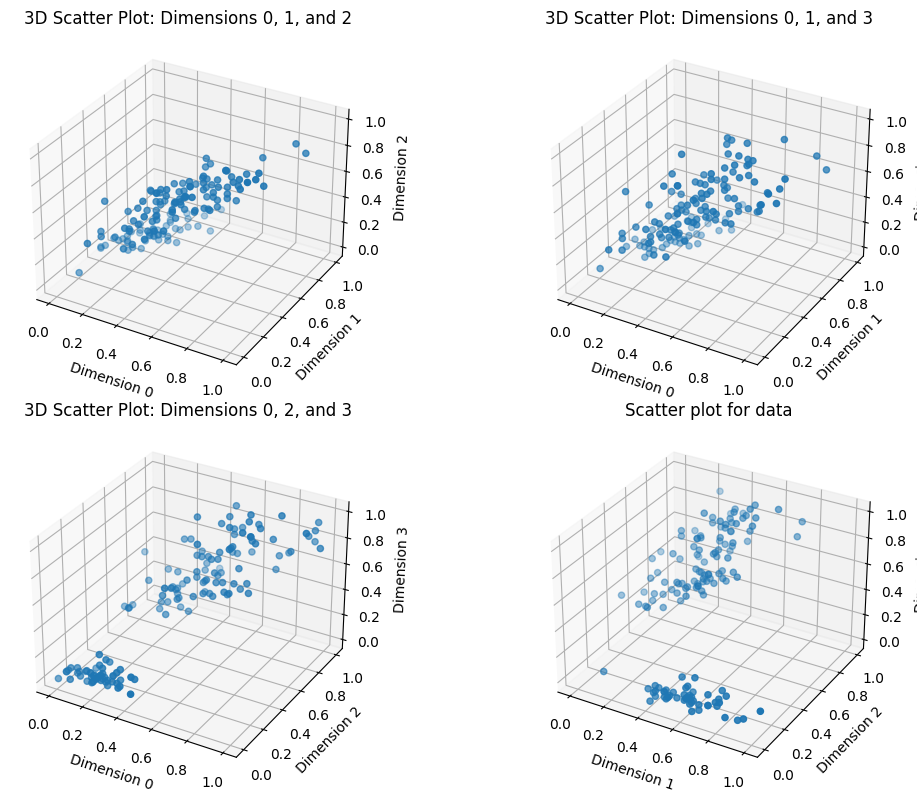

In [2]:
# Load the Iris dataset
iris = load_iris()

# Access attributes
data = iris.data  # The feature data (sepal length, sepal width, petal length, petal width)
norm_data = normalize(data)
target = iris.target  # The target labels (0 for Setosa, 1 for Versicolor, and 2 for Virginica)
target_names = iris.target_names  # The names of the target classes

# See the description of the dataset
description = iris.DESCR
print(description)

# Store datapoints by cluster
target_clusters = {}
for i in range(len(data)):
    target_i = target_names[target][i]

    if target_i not in target_clusters.keys():
        target_clusters[target_i] = []
    target_clusters[target_i].append(i)



# Plot the normalized data in the hypercube [0,1]x[0,1]x[0,1] for all sets of dimensions.
plotting = True
if plotting: scatter(norm_data)


Mountain Clustering

Cluster Center: 50, Data Points: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Cluster Center: 68, Data Points: [50, 51, 52, 56, 70, 77, 85, 86, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
Cluster Center: 37, Data Points: [53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 106, 119, 133, 134]


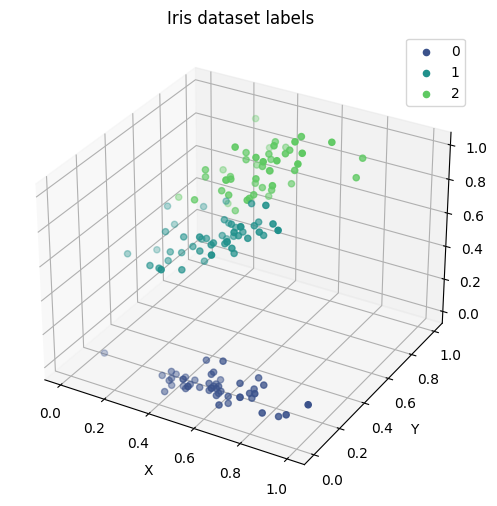

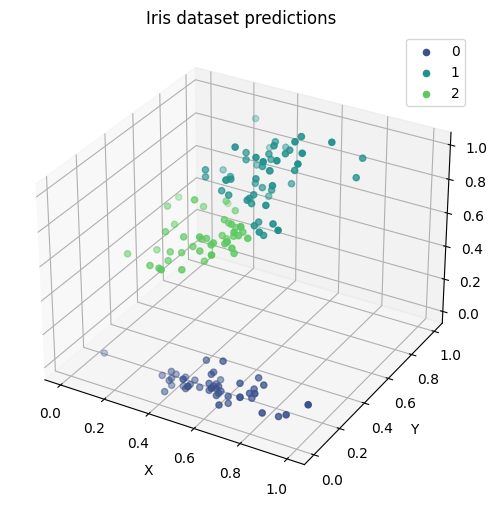

{'setosa': (1.0, 50), 'versicolor': (0.84, 37), 'virginica': (0.92, 68)}

In [4]:
G = grid(dim = 3, size = 1/4)
data = norm_data[:,1:4]

model = MountainClustering(sigma=0.32, beta=0.464, max_iterations=100)
clusters = model.cluster(data, G)

for center, indices in clusters.items():
    print(f"Cluster Center: {center}, Data Points: {indices}")

plot_data_by_clusters_3d(data, target_clusters, title = "Iris dataset labels")
plot_data_by_clusters_3d(data, clusters, title = "Iris dataset predictions")

similarity_index(clusters, target_clusters)

Box Method

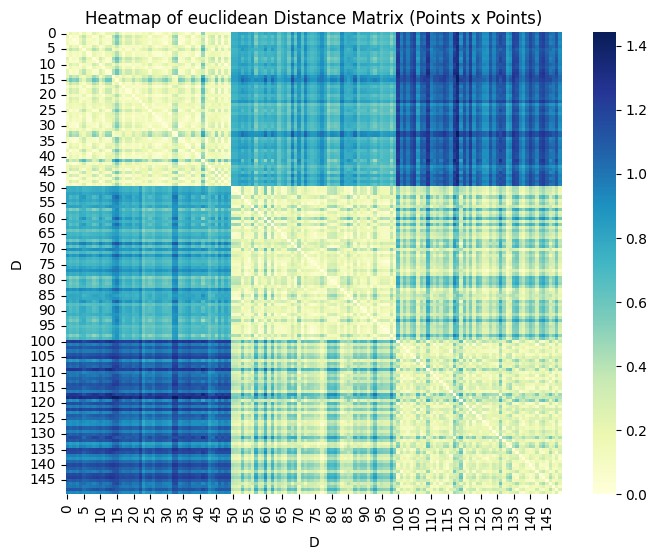

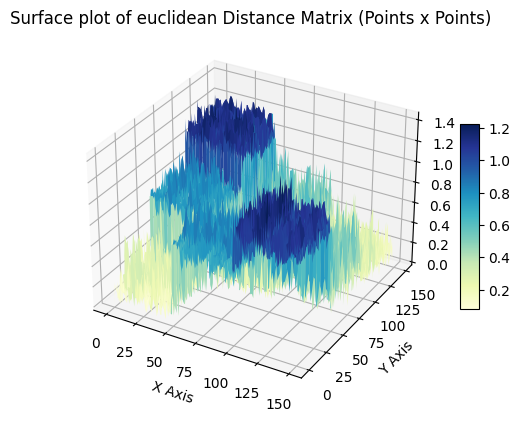

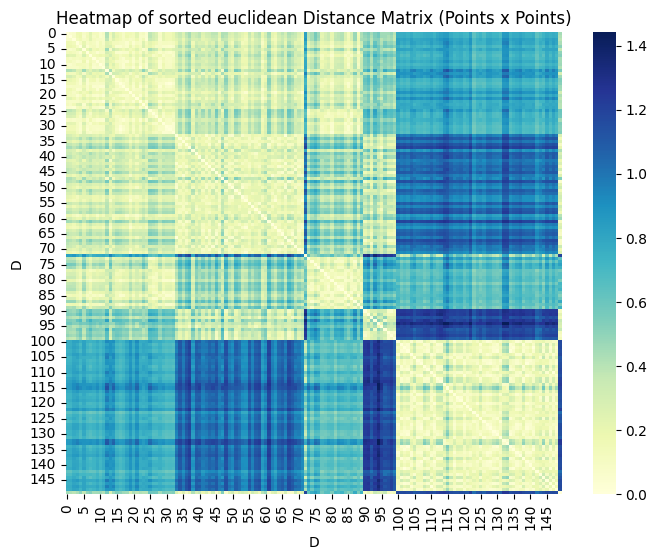

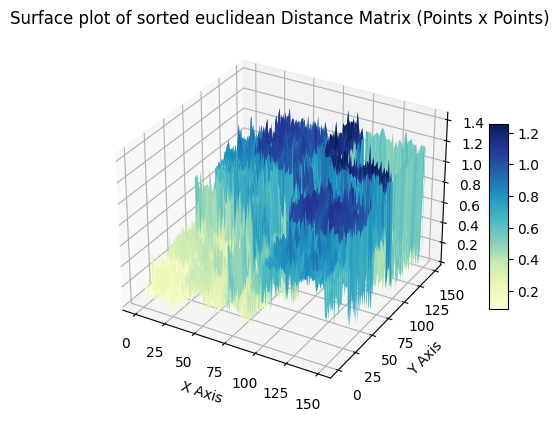

In [4]:
plotting = True
metric = 'euclidean'
clusters = 4
categorical = None
# If data contains categorical variables, use one-hot-encoding. Normalize data
if categorical != None:
    categorical_data = one_hot_encoding(data, categorical)
    norm_data = normalize(categorical_data)
else: norm_data = normalize(data)



# Calculate the distance matrix from all points to all points and plot the heatmap.
D = distance(norm_data, metric = metric)
if plotting: 
    heatmap(D, "Heatmap of "+metric+" Distance Matrix (Points x Points)") 
    surface(D, "Surface plot of "+metric+" Distance Matrix (Points x Points)")

# Sort the distance matrix using the boxes cluster criteria and plot the heatmap and surface map.
D, _, _ = sort_distances(distance(norm_data, metric = metric), div=clusters)
if plotting: 
    heatmap(D, "Heatmap of sorted "+metric+" Distance Matrix (Points x Points)")
    surface(D, "Surface plot of sorted "+metric+" Distance Matrix (Points x Points)")

vertices = grid(norm_data.shape[1], 1/2)

# Calculate the distance matrix from all vertices to all points and plot the heatmap.
D = distance(norm_data, vertices, metric = metric)
# if plotting: 
#     heatmap(D, "Heatmap of "+metric+" Distance Matrix (Vertices x Points)") 
#     surface(D, "Surface plot of "+metric+" Distance Matrix (Vertices x Points)")

Clusters = []
Metrics = ['euclidean', 'manhattan', 'cosine', 'lp']
Metrics = ['euclidean']
for met in Metrics:

    D = distance(norm_data, metric = met)

    b = boxes(D, div = clusters)
    
    M = box_clusters(b, D)
    Clusters.append(M)

    labels = neighbors(D, clusters, 0.15)

    Clusters.append(labels)



In [14]:
D = distance(norm_data, metric = 'euclidean')
b = boxes(D, div = 4)
M = box_clusters(b, D)
len(M)

3

Mountain clustering

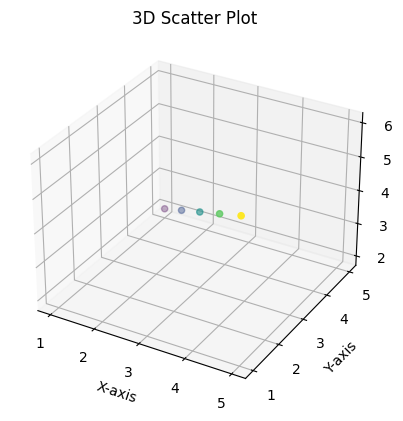

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting toolkit

def plot_3d_scatter(x, y, z, title="3D Scatter Plot", xlabel="X-axis", ylabel="Y-axis", zlabel="Z-axis"):
    """
    Create a 3D scatter plot.

    Args:
        x (list or array): Data for the X-axis.
        y (list or array): Data for the Y-axis.
        z (list or array): Data for the Z-axis.
        title (str): Title of the plot (default is "3D Scatter Plot").
        xlabel (str): Label for the X-axis (default is "X-axis").
        ylabel (str): Label for the Y-axis (default is "Y-axis").
        zlabel (str): Label for the Z-axis (default is "Z-axis").

    Returns:
        None
    """
    fig = plt.figure()  # Create a figure
    ax = fig.add_subplot(111, projection='3d')  # Add a 3D subplot

    # Normalize the Z-values to be in the range [0, 1] for colormap mapping
    z_normalized = (z - np.min(z)) / (np.max(z) - np.min(z))

    # Create a colormap to map Z-values to colors (you can change the colormap)
    colors = plt.cm.viridis(z_normalized)

    # Create the scatter plot
    ax.scatter(x, y, z, color=colors, marker='o')

    # Set labels for the axes
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)

    # Set the title of the plot
    ax.set_title(title)

    plt.show()

# Example usage
if __name__ == "__main__":
    x_data = [1, 2, 3, 4, 5]
    y_data = [5, 4, 3, 2, 1]
    z_data = [2, 3, 4, 5, 6]

    plot_3d_scatter(x_data, y_data, z_data)


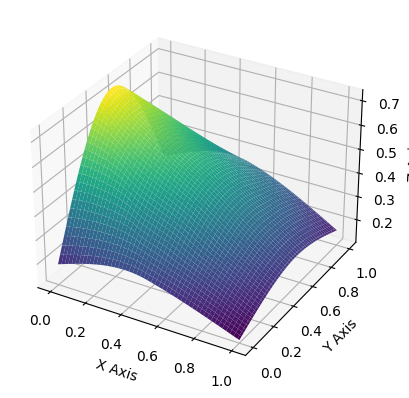

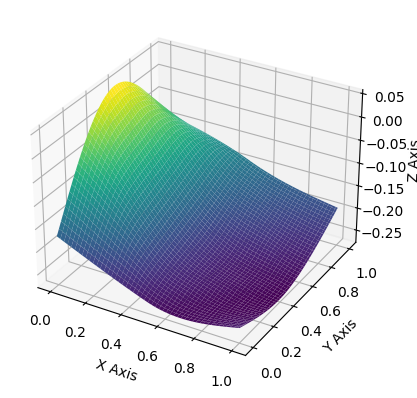

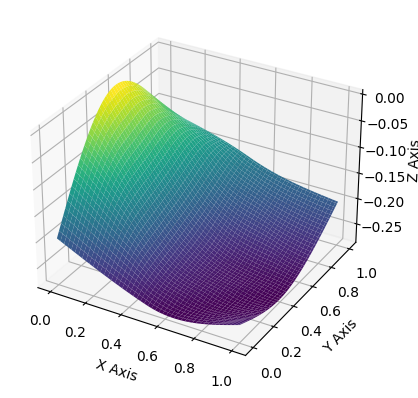

[13, 4, 7]
{13: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]}


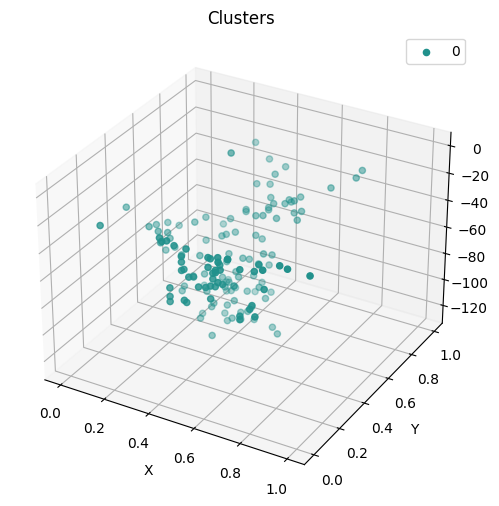

In [121]:
import numpy as np

def mountain_function(data: np.array, G: np.array, sigma: float = 0.9):
    mv = []
    for i in range(len(G)): 
        m = 0
        v = G[i]
        for xi in data:
            m += np.exp(-(np.linalg.norm(v-xi )**2)/(2*sigma**2))
        mv.append( m)
    return np.array(mv)

def new_mountain_function(mv: np.array, G: np.array, center: int, beta: float = 0.9):
    mci = []
    for i in range(len(G)): 
        v = G[i]
        mci.append(mv[i] - mv[center] * np.exp(-(np.linalg.norm(v - G[center])**2)/(2 * beta**2)))
    return np.array(mci)

def select_center(data: np.array, G: np.array, sigma: float = 0.9):  
    mv = mountain_function(data, G, sigma = sigma)
    max_mountain_function = [np.max(mv),np.argmax(mv)]
    return max_mountain_function[1], mv

def select_new_center(mv: np.array, G: np.array, center: int, beta: float = 0.9):  

    m_new = new_mountain_function(mv, G, center, beta = beta)
    new_center = np.argmax(m_new)
    
    return new_center, m_new

def assign_to_centers(data: np.array, G: np.array, centers: np.array, sigma: float = 0.9):
    clusters = {}
    for i, d in enumerate(data):
        mv = mountain_function(np.array([d]), G[centers], sigma = sigma)

        if centers[np.argmax(mv)] not in clusters.keys():
            clusters[centers[np.argmax(mv)]] = []
        clusters[centers[np.argmax(mv)]].append(i)
    
    return clusters

def mountain_clustering(data: np.array, G: np.array , sigma: float = 0.5, beta: float = 0.625, max_iterations: int = 100 ) -> dict:
    # Initialize a list to store cluster centers
    centers = []

    center, mv = select_center(data, G, sigma=sigma)
    centers.append(center)


    scatter_to_surface(G[:,0], G[:,1], mv)
    # plot_3d_scatter(G[:,0], G[:,1], mv)
    boo = True
    iteration_count = 0

    while boo and iteration_count < max_iterations:

        center, mv = select_new_center(mv, G, center, beta=beta)

        # Stop when your current center is the same as the last or if you meet other convergence criteria
        if centers[-1] == center:
            boo = False
        else:
            centers.append(center)
            # plot_3d_scatter(G[:,0], G[:,1], mv)
            scatter_to_surface(G[:,0], G[:,1], mv)
        iteration_count += 1
    print(centers)
    clusters = assign_to_centers(data, G, centers, sigma)
    print(clusters)

    return clusters


G = grid(dim = 3, size = 1/2)


clusters = mountain_clustering(norm_data[:,1:4], G)
plot_data_by_clusters_3d(norm_data[:,1:4], clusters, axis = [0,1,2])

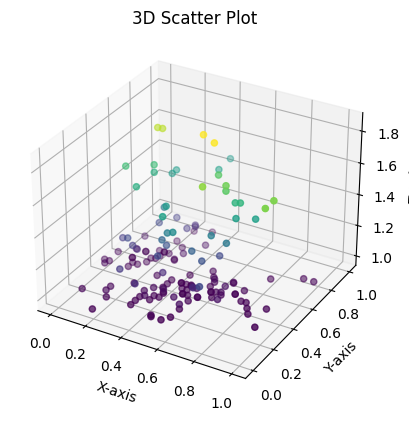

[85, 4]
None


In [13]:
import numpy as np

def substractive_function(data: np.array, ra: float = 0.9):
    D = np.zeros(len(data))
    for i in range(len(data)): 
        Di = 0
        xi = data[i]
        for xj in data:
            Di += np.exp(-(np.linalg.norm(xi-xj )**2)/((ra/2)**2))
        D[i] = Di
    return np.array(D)

def new_substractive_function(D: np.array, center: int, rb: float = 0.9):
    mci = []
    for i in range(len(data)): 
        xi = data[i]
        mci.append(D[i] - D[center] * np.exp(-(np.linalg.norm(xi - data[center])**2)/(2 * rb**2)))
    return np.array(mci)

def select_center(data: np.array, ra: float = 0.9):  
    D = substractive_function(data, ra = ra)
    max_substractive_function = [np.max(D),np.argmax(D)]
    return max_substractive_function[1], D

def select_new_center(D: np.array, center: int, rb: float = 0.9):  

    m_new = new_substractive_function(D, center, rb = rb)
    new_center = np.argmax(m_new)
    
    return new_center, m_new

def has_converged(data, current_centers, threshold= 0.9):
    """
    Check if the clustering process has converged by comparing the last selected center.

    Parameters:
    - data: The data points.
    - current_centers: An array of indices of the chosen centers in the current iteration.
    - threshold: The threshold for convergence.

    Returns:
    - True if the last selected center has not changed, indicating convergence. False otherwise.
    """
    if len(current_centers) <= 1:
        return True  # Convergence with one or no centers

    last_center = current_centers[-1]
    second_last_center = current_centers[-2]

    if abs(last_center - second_last_center) < threshold:
        return True  # The last selected center hasn't changed

    return False  # The last selected center has changed

def assign_to_centers(data: np.array, centers: np.array, ra: float = 0.1):
    clusters = {}
    for i, d in enumerate(data):
        D = substractive_function(np.array([d]), data[centers], ra = ra)

        if centers[np.argmax(D)] not in clusters.keys():
            clusters[centers[np.argmax(D)]] = []
        clusters[centers[np.argmax(D)]].append(i)
    
    return clusters

def substractive_clustering(data: np.array, ra: float = 0.5, rb: float = 0.625, max_iterations: int = 7 ) -> dict:
    # Initialize a list to store cluster centers
    centers = []

    center, D = select_center(data, ra=ra)
    centers.append(center)
    plot_3d_scatter(data[:,0], data[:,1], D)
    

    boo = True
    iteration_count = 0

    while True and iteration_count < max_iterations:

        center, D = select_new_center(D, center, rb=rb)
        new_centers = centers
        new_centers.append(center)
        converged = has_converged(data, new_centers)
        # Stop when your current center is the same as the last or if you meet other convergence criteria
        if centers[-1] == center:
            break
        # elif converged:
        #     break
        else:
            centers.append(center)
            plot_3d_scatter(data[:,0], data[:,1], D)
        iteration_count += 1

    print(centers)
    # clusters = assign_to_centers(data, centers, ra)
    # print(clusters)

    # return clusters



clusters = substractive_clustering(norm_data)
print(clusters)
# plot_data_by_clusters_3d(data, clusters, axis = [1,2,3])

In [8]:
import numpy as np

class SubtractiveClustering:
    def __init__(self, ra: float = 0.5, rb:float = 0.75, stop_criterion='same_center'):
        self.ra = ra
        self.rb = rb
        self.stop_criterion = stop_criterion
        self.cluster_centers = []

    def density_measure(self, data, center_idx):
        density = 0
        center = data[center_idx]
        for i in range(len(data)):
            if i != center_idx:
                distance = np.linalg.norm(center - data[i])
                density += np.exp(-distance**2 / (self.ra**2))
        return density

    def revise_density_measures(self, data, center_idx):
        if not self.cluster_centers:  # Check if cluster_centers is empty
            return
        center = data[center_idx]
        for i in range(len(data)):
            if i != center_idx:
                distance = np.linalg.norm(center - data[i])
                data[i][-1] -= self.cluster_centers[-1][-1] * np.exp(-distance**2 / (self.rb**2))

    def fit(self, data):
        self.cluster_centers = []  # Initialize cluster centers
        prev_center = None  # Previous chosen center

        while True:
            max_density = -1
            chosen_center = None

            # Calculate density measures for each data point
            density_measures = []
            for i in range(len(data)):
                density_measures.append(self.density_measure(data, i))

                # Choose the data point with the highest density as the next center
                if density_measures[i] > max_density:
                    max_density = density_measures[i]
                    chosen_center = i

            # Check if the stop criterion is met
            if self.stop_criterion == 'same_center' and chosen_center == prev_center:
                break

            # Append the chosen center with its density measure to the cluster centers
            chosen_data_point = np.append(data[chosen_center], density_measures[chosen_center])
            self.cluster_centers.append(chosen_data_point)

            # Revise density measures
            self.revise_density_measures(data, chosen_center)

            prev_center = chosen_center

        return np.array(self.cluster_centers)[:, :-1]

# Example usage:
if __name__ == "__main__":
    ra = 0.5  # Set your desired ra value
    rb = 0.75  # Set your desired rb value
    stop_criterion = 'same_center'
    
    data = norm_data

    clustering = SubtractiveClustering(ra, rb, stop_criterion)
    cluster_centers = clustering.fit(data)

    print("Cluster Centers:")
    print(cluster_centers)


Cluster Centers:
[[ 4.72222222e-01  3.75000000e-01  5.93220339e-01  5.83333333e-01]
 [ 5.00000000e-01  3.33333333e-01  6.27118644e-01 -6.77222690e+01]
 [ 2.22222222e-01  5.83333333e-01  8.47457627e-02 -2.18679202e+01]
 [ 2.50000000e-01  5.83333333e-01  6.77966102e-02 -2.77577433e+01]
 [ 1.94444444e-01  6.66666667e-01  6.77966102e-02 -1.91722470e+01]
 [ 2.22222222e-01  6.25000000e-01  6.77966102e-02 -2.07646709e+01]
 [ 1.94444444e-01  5.83333333e-01  8.47457627e-02 -2.49352348e+01]
 [ 8.33333333e-02  5.83333333e-01  6.77966102e-02 -2.27084870e+01]
 [ 1.94444444e-01  6.25000000e-01  5.08474576e-02 -2.86187595e+01]
 [ 2.50000000e-01  6.25000000e-01  8.47457627e-02 -3.10223207e+01]
 [ 1.66666667e-01  4.58333333e-01  8.47457627e-02 -3.33235663e+01]
 [ 2.22222222e-01  6.25000000e-01  6.77966102e-02 -3.83966243e+01]
 [ 4.16666667e-01  2.91666667e-01  6.94915254e-01 -6.40197059e+01]
 [ 5.55555556e-01  2.91666667e-01  6.61016949e-01 -6.57284703e+01]
 [ 5.00000000e-01  3.33333333e-01  6.27118644